# Fashion images playground

Play around with the fashion image data set on Kaggle: https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

C:\Users\tient\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/fashionmnist/"

In [5]:
os.listdir(PATH)

['fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 'fashionmnist.zip',
 'models',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'tmp',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [6]:
train = pd.read_csv(PATH+'fashion-mnist_train.csv')
test = pd.read_csv(PATH+'fashion-mnist_test.csv')

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = train.iloc[:,0]
x = train.iloc[:,1:]
y_val = test.iloc[:,0]
x_val = test.iloc[:,1:]

In [9]:
x = np.array(x); y = np.array(y)
x_val = np.array(x_val); y_val = np.array(y_val)

In [10]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (60000, 784), numpy.ndarray, (60000,))

In [11]:
x_imgs = np.reshape(x, (-1,28,28)); x_imgs.shape

(60000, 28, 28)

In [12]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

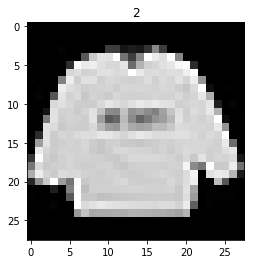

In [13]:
show(x_imgs[0], y[0])

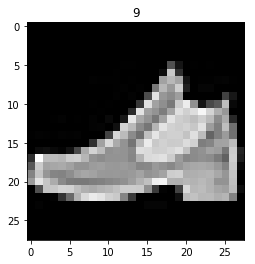

In [14]:
show(x_imgs[1], y[1])

In [15]:
y.view()

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [21]:
mean = x.mean()
std = x.std()

x=(x-mean)/std
mean, std, x.mean(), x.std()

(72.9568306122449,
 89.96686298512124,
 -1.8355687340469255e-16,
 0.9999999999999977)

In [22]:
x_val = (x_val-mean)/std
x_val.mean(), x_val.std()

(0.002267216567044651, 1.003404268164145)

In [16]:
from fastai.metrics import *

import torch.nn as nn

In [23]:
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

In [24]:
md = ImageClassifierData.from_arrays(PATH, (x,y), (x_val,y_val))

In [25]:
loss=nn.NLLLoss()
metrics=[accuracy]
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [26]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.591523   0.576322   0.8025    
    1      0.515126   0.527103   0.8316                                                                                
    2      0.529941   0.539652   0.8184                                                                                
    3      0.540836   0.563424   0.805                                                                                 
    4      0.554621   0.587794   0.8054                                                                                



[array([0.58779]), 0.8054]

In [27]:
set_lrs(opt, 1e-2)

In [28]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.353787   0.366395   0.8654    
    1      0.328325   0.351572   0.8707                                                                                
    2      0.322676   0.331704   0.8761                                                                                



[array([0.3317]), 0.8761]

In [29]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.298361   0.327334   0.8775    
    1      0.320049   0.330038   0.8781                                                                                
    2      0.316119   0.343317   0.8716                                                                                



[array([0.34332]), 0.8716]

In [35]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.304126   0.3221     0.8795    
    1      0.266262   0.337357   0.8774                                                                                
    2      0.293989   0.311992   0.8864                                                                                



[array([0.31199]), 0.8864]

After several training this model gets to nearly 89% accuracy.